In [1]:
#import file
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

In [2]:

# df = pd.read_csv('FOOD-DATA.csv')
df = pd.read_csv('Disease_Focused_Food_Data.csv')

print(df.head())
print(df.info())
print(df.describe())

#ktra du lieu thieu
print(df.isnull().sum())

   Caloric Value        Fat  Saturated Fats  Carbohydrates      Sugars  \
0            202   8.757532       15.337914     208.141928   65.668886   
1            535  39.971611       15.412405     154.180682   14.201464   
2            370  30.128191       16.960880     189.175700   33.871181   
3            206  24.089990        5.208911     261.982445   90.135569   
4            171  45.785947       22.945887     175.476826  110.613804   

     Protein  Dietary Fiber  Cholesterol       Sodium      Calcium  \
0  37.532558      46.713318    16.004399   739.747858   890.500898   
1  30.673531      41.547810   136.429303   119.937873   533.012655   
2  96.809652      35.163260   202.435891  2513.094257   715.113728   
3  57.982338      36.002005   203.259484  2925.337258  1007.503539   
4  37.991319      23.624091   111.936785   449.605634   974.790400   

    Magnesium    Potassium       Iron       Zinc   Phosphorus    Vitamin A  \
0  339.565463   527.187874  16.596078   8.499476   128.1

In [3]:
# chuan hoa

# Tách các cột số (numeric features) để chuẩn hóa
# df = pd.read_csv('FOOD-DATA.csv')
numeric_columns = [
    'Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
    'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
    'Calcium', 'Iron', 'Magnesium',
    'Phosphorus', 'Potassium',  'Zinc', 
]

# Chuẩn hóa bằng Min-Max Scaling
min_max_scaler = MinMaxScaler()
food_data_minmax = df.copy()
food_data_minmax[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Kiểm tra kết quả sau khi chuẩn hóa
print("Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):")
print(food_data_minmax.head())

Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):
   Caloric Value       Fat  Saturated Fats  Carbohydrates    Sugars   Protein  \
0       0.170034  0.079258       15.337914       0.682627  0.433850  0.343188   
1       0.730640  0.776330       15.412405       0.495843  0.087316  0.270829   
2       0.452862  0.556507       16.960880       0.616976  0.219754  0.968528   
3       0.176768  0.421662        5.208911       0.868993  0.598586  0.558922   
4       0.117845  0.906176       22.945887       0.569558  0.736468  0.348028   

   Dietary Fiber  Cholesterol    Sodium   Calcium  Magnesium  Potassium  \
0       0.933827     0.052752  0.234317  0.733046   0.845915   0.119477   
1       0.828081     0.454609  0.023731  0.421164   0.394959   0.284841   
2       0.697379     0.674872  0.836826  0.580034   0.050428   0.233467   
3       0.714549     0.677621  0.976888  0.835122   0.401797   0.208062   
4       0.461153     0.372878  0.135738  0.806582   0.674263   0.407205   

       Iron      

In [4]:

# Xử lý ngoại lai với IQR

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Loại bỏ giá trị ngoại lai
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_no_outliers = remove_outliers_iqr(df, numeric_columns)

# Kiểm tra số lượng dữ liệu sau khi loại bỏ ngoại lai
print(f"Số lượng dữ liệu sau khi loại bỏ ngoại lai: {df_no_outliers.shape[0]}")

Số lượng dữ liệu sau khi loại bỏ ngoại lai: 500


In [5]:
# thay thế giá trị trung bình 

def replace_outliers_with_mean(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Tính trung bình các giá trị không ngoại lai
        mean_value = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()

        # Thay thế giá trị ngoại lai bằng giá trị trung bình
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), mean_value, data[col])
    return data

df_replaced_outliers = replace_outliers_with_mean(df_no_outliers, numeric_columns)

# Kiểm tra dữ liệu sau khi thay thế ngoại lai
print("Dữ liệu sau khi thay thế ngoại lai:")
print(df_replaced_outliers.head())

Dữ liệu sau khi thay thế ngoại lai:
   Caloric Value        Fat  Saturated Fats  Carbohydrates      Sugars  \
0          202.0   8.757532       15.337914     208.141928   65.668886   
1          535.0  39.971611       15.412405     154.180682   14.201464   
2          370.0  30.128191       16.960880     189.175700   33.871181   
3          206.0  24.089990        5.208911     261.982445   90.135569   
4          171.0  45.785947       22.945887     175.476826  110.613804   

     Protein  Dietary Fiber  Cholesterol       Sodium      Calcium  \
0  37.532558      46.713318    16.004399   739.747858   890.500898   
1  30.673531      41.547810   136.429303   119.937873   533.012655   
2  96.809652      35.163260   202.435891  2513.094257   715.113728   
3  57.982338      36.002005   203.259484  2925.337258  1007.503539   
4  37.991319      23.624091   111.936785   449.605634   974.790400   

    Magnesium    Potassium       Iron       Zinc   Phosphorus    Vitamin A  \
0  339.565463   527.

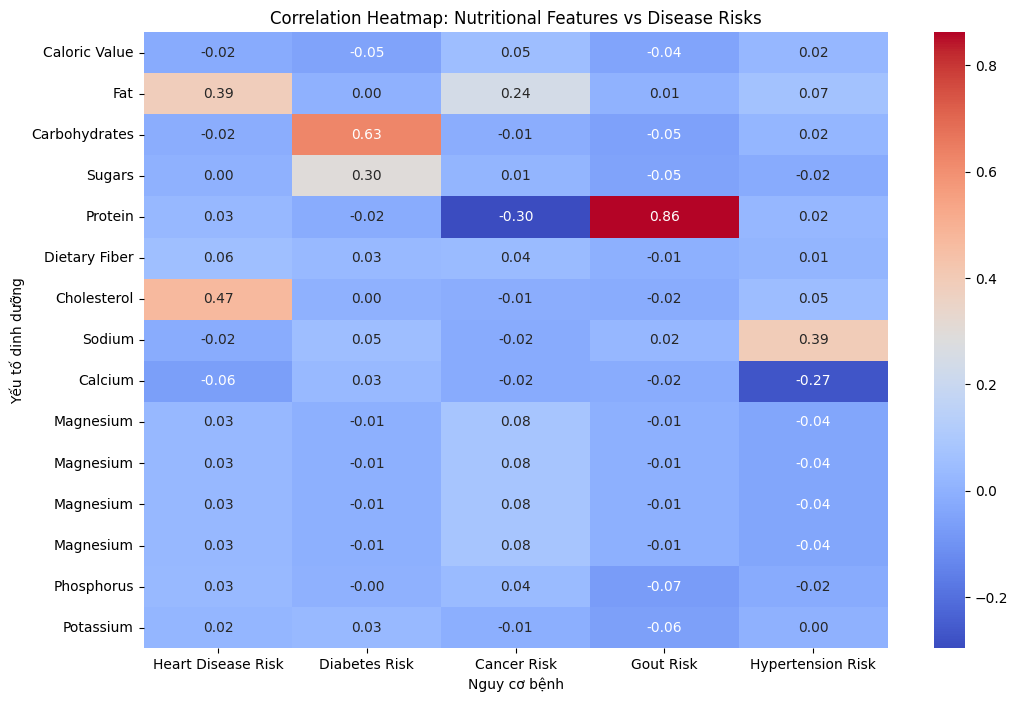

In [6]:



df['Heart Disease Risk'] = ((df['Cholesterol'] > 200) & (df['Fat'] > 30)).astype(int)

df['Diabetes Risk'] = ((df['Sugars'] > 50) & (df['Carbohydrates'] > 200)).astype(int)

df['Cancer Risk'] = ((df['Fat'] > 35) & (df['Protein'] < 20)).astype(int)

df['Gout Risk'] = ((df['Protein'] > 50)).astype(int)

df['Hypertension Risk'] = ((df['Sodium'] > 2300) & (df['Calcium'] < 500)).astype(int)

# Chọn các cột liên quan
nutritional_features = ['Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 
                        'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 
                        'Calcium', 'Magnesium','Magnesium', 'Phosphorus' , 'Potassium' ]
disease_columns = ['Heart Disease Risk', 'Diabetes Risk', 'Cancer Risk', 
                   'Gout Risk', 'Hypertension Risk']



# Lọc dữ liệu
subset = df[nutritional_features + disease_columns]

# Tính ma trận tương quan
correlation_matrix = subset.corr().loc[nutritional_features, disease_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Nutritional Features vs Disease Risks')
plt.xlabel('Nguy cơ bệnh')
plt.ylabel('Yếu tố dinh dưỡng')
plt.show()






In [7]:


# Chọn mục tiêu và yếu tố dự đoán
X = df[nutritional_features]
y = df['Heart Disease Risk']  # bệnh tim 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất:", [nutritional_features[i] for i in important_features])


Các yếu tố quan trọng nhất: ['Fat', 'Dietary Fiber', 'Cholesterol', 'Calcium', 'Phosphorus']


In [8]:
# Chọn mục tiêu và yếu tố dự đoán
X = df[nutritional_features]
y = df['Diabetes Risk']  # bệnh tiểu đường 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng đến bệnh:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng đến bệnh: ['Caloric Value', 'Carbohydrates', 'Sugars', 'Sodium', 'Potassium']


In [9]:
# Chọn mục tiêu và yếu tố dự đoán
X = df[nutritional_features]
y = df['Cancer Risk']  # bệnh tiểu đường 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất: ['Caloric Value', 'Fat', 'Protein', 'Magnesium', 'Magnesium']


In [10]:
# Chọn mục tiêu và yếu tố dự đoán
X = df[nutritional_features]
y = df['Gout Risk']  # bệnh tiểu đường 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất: ['Carbohydrates', 'Sugars', 'Protein', 'Phosphorus', 'Potassium']


In [11]:
# Chọn mục tiêu và yếu tố dự đoán
X = df[nutritional_features]
y = df['Hypertension Risk']  # bệnh tiểu đường 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất: ['Fat', 'Cholesterol', 'Sodium', 'Calcium', 'Magnesium']


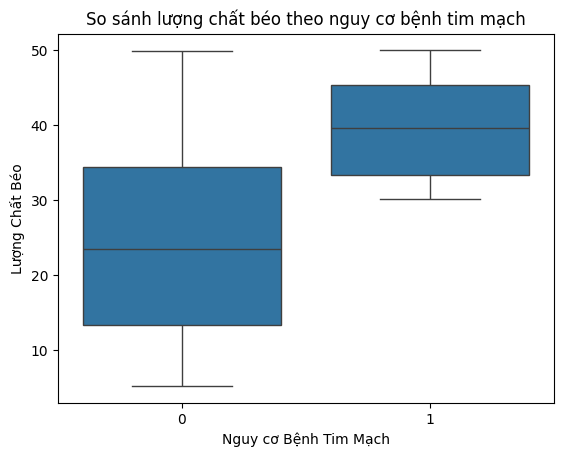

In [12]:
# Biểu đồ boxplot so sánh lượng chất béo theo nguy cơ bệnh tim mạch
sns.boxplot(x=df['Heart Disease Risk'], y=df['Fat'])
plt.title('So sánh lượng chất béo theo nguy cơ bệnh tim mạch')
plt.xlabel('Nguy cơ Bệnh Tim Mạch')
plt.ylabel('Lượng Chất Béo')
plt.show()


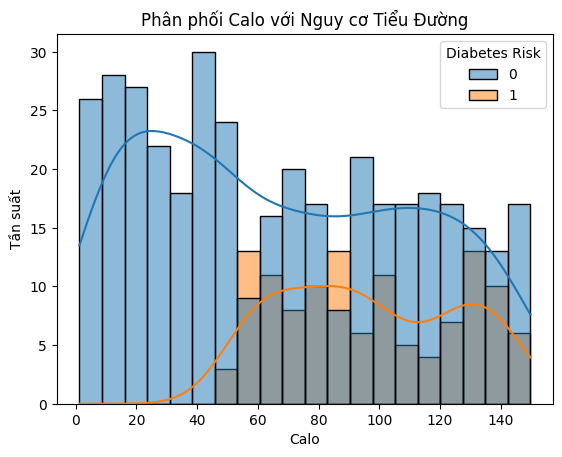

In [13]:
# Biểu đồ histogram cho phân phối calo với nguy cơ tiểu đường
sns.histplot(df, x='Sugars', hue='Diabetes Risk', kde=True, bins=20)
plt.title('Phân phối Calo với Nguy cơ Tiểu Đường')
plt.xlabel('Calo')
plt.ylabel('Tần suất')
plt.show()


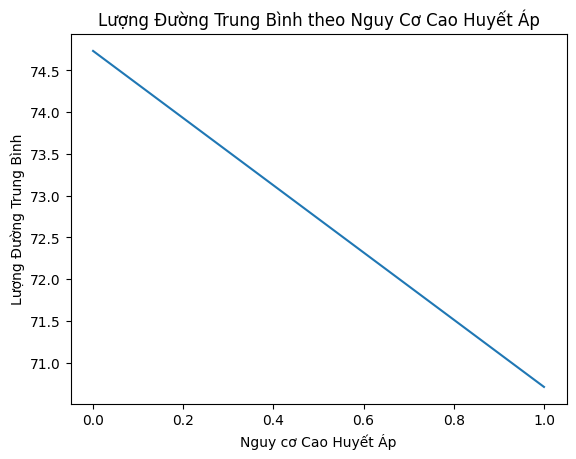

In [14]:
# Lượng đường trung bình theo nguy cơ cao huyết áp
avg_sugar = df.groupby('Hypertension Risk')['Sugars'].mean()
avg_sugar.plot(kind='line')
plt.title('Lượng Đường Trung Bình theo Nguy Cơ Cao Huyết Áp')
plt.xlabel('Nguy cơ Cao Huyết Áp')
plt.ylabel('Lượng Đường Trung Bình')
plt.show()


In [15]:
# Xác định biến mục tiêu và biến dự đoán
# Biến mục tiêu (Target): Một trong các cột nguy cơ bệnh, ví dụ: 'Heart Disease Risk'.
# Biến dự đoán (Features): Các cột chứa thông tin dinh dưỡng như 'Calories', 'Fat',

# Xác định biến mục tiêu và biến dự đoán
# target = 'Heart Disease Risk'  # Thay bằng bệnh bạn muốn phân tích
# features = ['Fat', 'Dietary Fiber', 'Cholesterol', 'Calcium', 'Phosphorus']  # Các yếu tố dinh dưỡng
# Các yếu tố quan trọng nhất: ['Fat', 'Dietary Fiber', 'Cholesterol', 'Calcium', 'Phosphorus']

target = 'Gout Risk'  # Thay bằng bệnh bạn muốn phân tích
features = ['Sugars', 'Protein', 'Phosphorus', 'Potassium', 'Carbohydrates']  # Các yếu tố dinh dưỡng

# Carbohydrates', 'Sugars', 'Protein', 'Phosphorus', 'Potassium
X = df[features]
y = df[target]



# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:


# Xây dựng mô hình cây quyết định
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán
y_pred_dt = dt_model.predict(X_test)

# Đánh giá mô hình
print("Đánh giá mô hình Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Độ chính xác:", accuracy_score(y_test, y_pred_dt))


Đánh giá mô hình Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Độ chính xác: 0.99


In [17]:


# Xây dựng mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
print("Đánh giá mô hình Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Độ chính xác:", accuracy_score(y_test, y_pred_rf))


Đánh giá mô hình Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Độ chính xác: 0.99


In [18]:
# Quy trình xây dựng và huấn luyện
# a. Chỉ số đánh giá hiệu quả
# Sử dụng các chỉ số:

# Độ chính xác (Accuracy): Đo lường tỷ lệ dự đoán đúng.
# Độ nhạy (Recall): Tỷ lệ phát hiện đúng các trường hợp có bệnh.
# Độ đặc hiệu (Specificity): Tỷ lệ phát hiện đúng các trường hợp không có bệnh.



# Tính các chỉ số đánh giá cho Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf, average='weighted')
precision = precision_score(y_test, y_pred_rf, average='weighted')

print("Confusion Matrix:\n", cm)
print("Độ nhạy (Recall):", recall)
print("Độ chính xác (Precision):", precision)


Confusion Matrix:
 [[47  1]
 [ 0 52]]
Độ nhạy (Recall): 0.99
Độ chính xác (Precision): 0.9901886792452831


In [19]:
# Phân tích kết quả
# a. Hiệu quả của mô hình trong dự đoán nhóm có nguy cơ cao
# Sử dụng classification_report để phân tích khả năng dự đoán của mô hình cho các nhóm nguy cơ cao.
# Xác định tỷ lệ dự đoán đúng/nhầm lẫn.
# b. Tính quan trọng của các yếu tố hành vi và dinh dưỡng
# Với Random Forest, bạn có thể tính toán độ quan trọng của từng đặc trưng (feature importance).
# Tính toán độ quan trọng của các yếu tố
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Hiển thị kết quả
print("Độ quan trọng của các yếu tố dinh dưỡng:")
print(feature_importance)

Độ quan trọng của các yếu tố dinh dưỡng:
         Feature  Importance
1        Protein    0.923492
3      Potassium    0.022839
4  Carbohydrates    0.019838
0         Sugars    0.017598
2     Phosphorus    0.016233


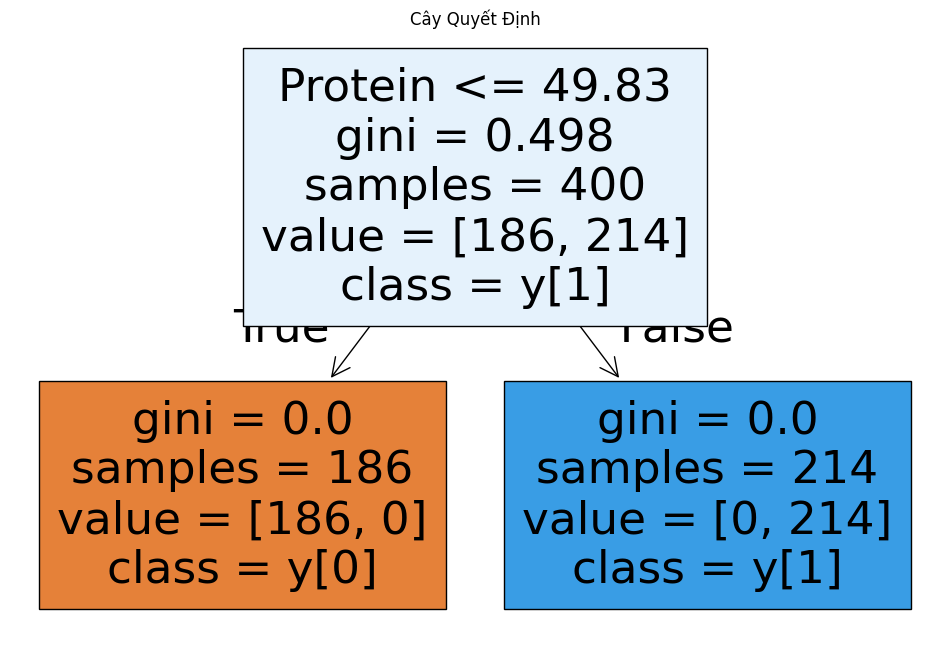

In [20]:


# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=True, filled=True)
plt.title("Cây Quyết Định")
plt.show()


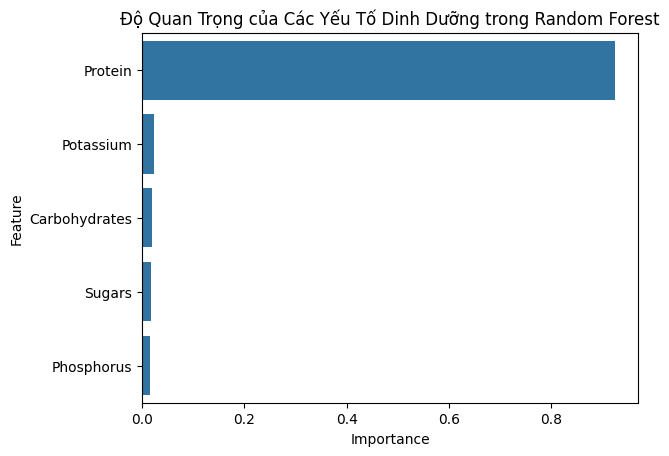

In [21]:
# Vẽ biểu đồ độ quan trọng
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Độ Quan Trọng của Các Yếu Tố Dinh Dưỡng trong Random Forest')
plt.show()


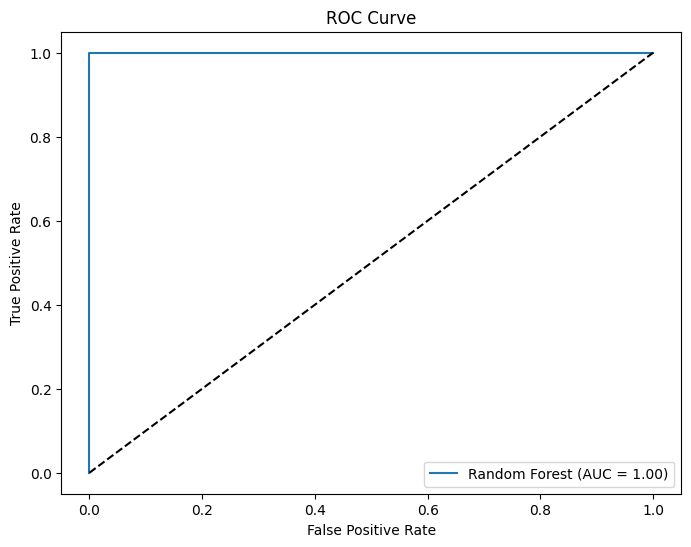

In [22]:


# Tính ROC Curve cho Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
